In [1]:
import pandas as pd
import re

In [2]:
data_dir = '../data/'

#### How much are phytochemicals in drugs?

In [3]:
drug_ingredients = pd.read_csv(data_dir + 'drugbank/drug_id_name_map.csv', index_col=[0])
drug_ingredients.head()

id            drug_name
1  DB00001            Lepirudin
2  DB00002            Cetuximab
3  DB00003         Dornase alfa
4  DB00004  Denileukin diftitox
5  DB00005           Etanercept

In [4]:
with open(data_dir + 'phytochemicals.txt', 'r') as f:
    lines = f.readlines()  

phytochemicals = [re.sub('\n', '', x) for x in lines]   
phytochemicals = [x.lower() for x in phytochemicals] 

print(phytochemicals[:10])
phytochemicals = set(phytochemicals)

['phytoene', 'zeaxanthin', 'lentinan', 'farnesyl pyrophosphate', 'pentose', 'carotene, gamma', 'theogallin', 'pectin', 'cembrene', 'pimaric acid']


In [5]:
drug_names = set(drug_ingredients.drug_name)

drugs_with_phytochemicals = dict()
phytochemicals_in_drugs = set()

phytochemicals = list(phytochemicals)

for drug_name in drug_names:
    ingredient = drug_name.lower()

    if ingredient in phytochemicals:
        drugs_with_phytochemicals[drug_name] = phytochemicals.index(ingredient)
        phytochemicals_in_drugs.add(ingredient)


print(phytochemicals_in_drugs)
print()
print('Number of drugs that contains phytochemicals:', len(drugs_with_phytochemicals), '/ out of', len(drug_names))

{'tannic acid', 'camphor', 'rutin', 'paclitaxel', 'thymol', 'curcumin', 'inulin', 'betulinic acid', 'beta carotene', 'menthol', 'capsaicin', 'salicylic acid', 'phenylalanine', 'tryptophan', 'cholesterol', 'hesperidin', 'geraniol', 'testosterone', 'lycopene', 'tyrosine', 'lutein', 'tocopherol', 'zeaxanthin', 'pectin', 'cholecalciferol', 'phenol'}

Number of drugs that contains phytochemicals: 26 / out of 4225


### Data Analysis
(in training dataset)

#### Drugs

In [6]:
drug_inchi_key = pd.read_csv(data_dir + 'triplets/drugs_inchi_key.tsv', sep='\t', index_col=[0])
print(drug_inchi_key.head(3))
print()


drug_subclass = pd.read_csv(data_dir + 'triplets/drug_subclass.tsv', sep='\t', index_col=[0])
print(drug_subclass.head(3))
print()

drug_salts = pd.read_csv(data_dir + 'triplets/drug_salts.tsv', sep='\t', index_col=[0])
print(drug_salts.head(3))
print()

drug_ingredients = pd.read_csv(data_dir + 'triplets/ingredients.tsv', sep='\t', index_col=[0])
print(drug_ingredients.head(3))
print()

drug_interactions = pd.read_csv(data_dir + 'triplets/ddi.tsv', sep='\t', index_col=[0])
print(drug_interactions.head(3))
print()

        id       relation                    inchi_key
1  DB00006  has_inchi_key  OIRCOABEOLEUMC-GEJPAHFPSA-N
2  DB00007  has_inchi_key  GFIJNRVAKGFPGQ-LIJARHBVSA-N
3  DB00014  has_inchi_key  BLCLNMBMMGCOAS-URPVMXJPSA-N

        id     relation subclass
1  DB00001  in_subclass  class_0
2  DB00002  in_subclass  class_0
3  DB00003  in_subclass  class_0

      drug  relation       salt_id
1  DB00007  contains  DBSALT000105
2  DB00007  contains  DBSALT003182
3  DB00010  contains  DBSALT001439

   drug_name  relation ingredient
0   refludan  contains    DB00001
1    erbitux  contains    DB00002
2  pulmozyme  contains    DB00003

     drug1                        interaction    drug2
0  DB06605  increase_anticoagulant_activities  DB00001
1  DB06695  increase_anticoagulant_activities  DB00001
2  DB01254                  increase_bleeding  DB00001



#### Food

In [7]:
food_compounds = pd.read_csv(data_dir + 'triplets/food_compound.tsv', sep='\t', index_col=[0])
print(food_compounds.head())
print()

compounds_cas_num = pd.read_csv(data_dir + 'triplets/compounds_cas_number.tsv', sep='\t', index_col=[0])
print(compounds_cas_num.head())
print()

     food_id  relation compound_id
0  FOOD00001  contains   FDB013255
1  FOOD00001  contains   FDB011904
2  FOOD00002  contains   FDB014613
3  FOOD00002  contains   FDB008322
4  FOOD00002  contains   FDB000474

  compound_id        relation cas_number
0   FDB015503  has_cas_number   469-38-5
1   FDB002558  has_cas_number   331-39-5
2   FDB000474  has_cas_number    56-87-1
3   FDB002251  has_cas_number    54-12-6
4   FDB000633  has_cas_number   520-18-3



#### Drug Supplements

In [8]:
ds_ingredients = pd.read_csv(data_dir + 'triplets/ds_ingredients.tsv', sep='\t', index_col=[0])
print(ds_ingredients.head())
print()

ds_relations = pd.read_csv(data_dir + 'triplets/ds_relations.tsv', sep='\t', index_col=[0])
print(ds_relations.head())
print()

                                        CUI1             REL   
0     Douglas Laboratories - L-Lysine 500 mg  has_ingredient  \
1  Met-Rx - Pure Protein Shake Vanilla Cream  has_ingredient   
2  Met-Rx - Pure Protein Shake Vanilla Cream  has_ingredient   
3  Met-Rx - Pure Protein Shake Vanilla Cream  has_ingredient   
4  Met-Rx - Pure Protein Shake Vanilla Cream  has_ingredient   

                    CUI2  
0     L-Lysine Free Form  
1             Saccharide  
2     Sodium-D-aspartate  
3          Oleovitamin A  
4  Magnesium Trisilicate  

                               CUI1             REL   
689301  1-Androsten-3beta-ol-17-one  interacts_with  \
689302                       4-DHEA  interacts_with   
689319                    Blackbush  interacts_with   
689320                    Blackbush  interacts_with   
689322                    Blackbush  interacts_with   

                                  CUI2  
689301                    Testosterone  
689302                    Testosterone 

## Graph visualization

In [9]:
import os
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
import torch
from torch import nn
from torch import Tensor
import torch_geometric
from torch_geometric.nn import GCNConv
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import WebKB
import torch_geometric.transforms as T
from torch_geometric.data import Data
import networkx as nx
from networkx.algorithms import community
from ogb.linkproppred import Evaluator, PygLinkPropPredDataset
import random
import itertools
from operator import itemgetter

In [10]:
!pip3 install pyvis

In [11]:
from pyvis.network import Network

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### BioKG

In [13]:
dataset_dir = '../data/dataset-ogb/'

dataset = PygLinkPropPredDataset(name='ogbl-ddi', root=dataset_dir, transform=T.ToSparseTensor())
data = dataset[0]

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')

Number of nodes: 4267
Number of edges: 2135822


In [14]:
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [15]:
split_edge = dataset.get_edge_split()
train_edge, valid_edge, test_edge = split_edge["train"], split_edge["valid"], split_edge["test"]
train_edge

{'edge': tensor([[4039, 2424],
         [4039,  225],
         [4039, 3901],
         ...,
         [ 647,  708],
         [ 708,  338],
         [ 835, 3554]])}

In [16]:
def random_sample(edge_index, num_nodes, k=10):
    nodes_idx = random.sample(range(num_nodes), k)
    mask = torch.from_numpy(np.isin(edge_index, nodes_idx).sum(axis=0) > 0)
    mask = mask.expand(2,-1)

    # select just edges with generated node index (nodes_idx)
    edge_index_sample = edge_index * mask 

    # get rid of 0s columns
    non_empty_mask = edge_index_sample.sum(dim=0).bool()
    edge_index_sample = edge_index_sample[:,non_empty_mask]
    
    return edge_index_sample

In [17]:
edge_index_sample = random_sample(torch.transpose(train_edge['edge'], 0, 1), data.num_nodes)
edge_index_sample

tensor([[4039, 4039, 4039,  ..., 2592, 2592, 2592],
        [1385, 3460,  175,  ...,  390, 3156, 2893]])

In [18]:
num_nodes = edge_index_sample.unique()
# num_nodes.size(0)
data = Data(edge_index=edge_index_sample, num_nodes=num_nodes.size(0))
data

Data(edge_index=[2, 5026], num_nodes=2422)

In [19]:
edge_index = data.edge_index.numpy()
print(edge_index.shape)
index = 225
edge_example_outward = edge_index_sample[:, np.where(edge_index_sample[0]==index)[0]]
edge_example_inward = edge_index_sample[:, np.where(edge_index_sample[1] == index)[0]]
edge_example_outward

(2, 5026)


tensor([[ 225,  225,  225,  225,  225],
        [4211,  175,   38,   22, 3460]])

In [20]:
edge_example_inward.shape

torch.Size([2, 0])

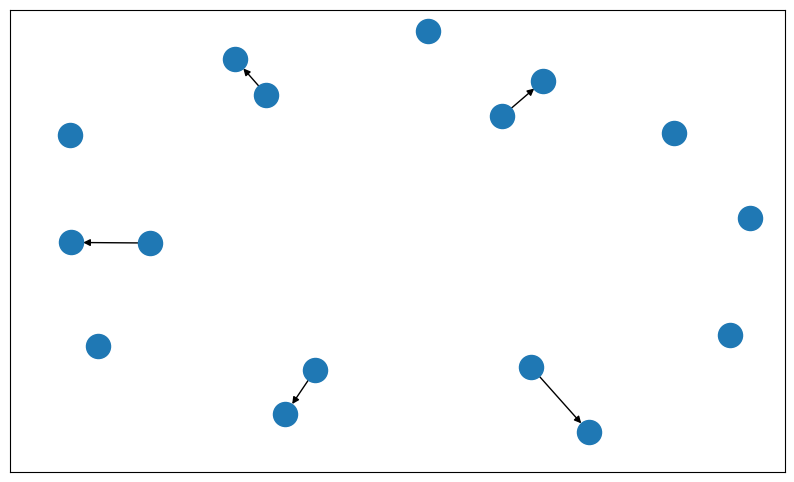

In [21]:
node_example = np.unique(np.concatenate(
    [edge_example_outward.flatten(), edge_example_inward.flatten()]))
plt.figure(figsize=(10, 6))
G = nx.DiGraph()
G.add_nodes_from(node_example)
G.add_edges_from(list(zip(edge_example_outward[0], edge_example_outward[1])))
G.add_edges_from(list(zip(edge_example_inward[0], edge_example_inward[1])))
nx.draw_networkx(G, with_labels=False)

In [22]:
def visuzlize_graph(data):
    G = to_networkx(data, to_undirected=False)
    pos = nx.spring_layout(G, seed=42)
    cent = nx.degree_centrality(G)
    node_size = list(map(lambda x: x * 800, cent.values()))
    cent_array = np.array(list(cent.values()))
    threshold = sorted(cent_array, reverse=True)[10]
    print("threshold", threshold)
    cent_bin = np.where(cent_array >= threshold, 1, 0.1)
    plt.figure(figsize=(12, 12))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size,
                                   cmap=plt.cm.viridis,
                                   node_color=cent_bin,
                                   nodelist=list(cent.keys()),
                                   alpha=cent_bin)
    labels = nx.draw_networkx_labels(G, pos=nx.spring_layout(G))
    edges = nx.draw_networkx_edges(G, pos, width=0.25, alpha=0.6)
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_names, font_color='red', font_size=12, font_weight='normal')
    plt.show()

### DrugBank data

In [23]:
my_data = 'triplets/train_drugbank.tsv'
data_df = pd.read_csv(data_dir + my_data, sep='\t')
data_df = data_df.dropna()

In [24]:
nodes = data_df[['head', 'tail']].stack().unique()
print('Number of unique nodes:', len(nodes))
nodes_map = {node: i for i, node in enumerate(nodes)}

edges = data_df['relation'].unique()
edges_map = {edge: i for i, edge in enumerate(edges)}
print('Number of unique edges:', len(edges))

Number of unique nodes: 9981
Number of unique edges: 6


In [25]:
heads = data_df['head'].map(nodes_map)
tails = data_df['tail'].map(nodes_map)

In [26]:
edges = torch.tensor([heads.values, tails.values])

/tmp/ipykernel_232/1872461729.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  edges = torch.tensor([heads.values, tails.values])


In [27]:
IDX = 'DB00008'
node_id = nodes_map[IDX]

In [28]:
def random_sample(G, k=100):
    sampled_nodes = random.sample(G.nodes, k)
    return G.subgraph(sampled_nodes)
    

data_graph = Data(edge_index=edges, num_nodes=len(nodes))
G = to_networkx(data_graph, to_undirected=False)
G_subgraph = random_sample(G)

In [29]:
def particular_sample(nodes_idx, edge_index):
    mask = torch.from_numpy(np.isin(edge_index, nodes_idx).sum(axis=0) > 0)
    mask = mask.expand(2,-1)

    # select just edges with generated node index (nodes_idx)
    edge_index_sample = edge_index * mask 

    # get rid of 0s columns
    non_empty_mask = edge_index_sample.sum(dim=0).bool()
    edge_index_sample = edge_index_sample[:,non_empty_mask]
    
    return edge_index_sample

In [30]:
# edges_sample = random_sample(edges, len(nodes), k=5)
edges_sample = particular_sample([node_id], edges)
print(edges_sample)
num_nodes = edges_sample.unique()
print('number of unique nodes:', num_nodes.size(0))
data_sample = Data(edge_index=edges_sample, num_nodes=num_nodes.size(0))
# visuzlize_graph(data_sample)

tensor([[1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172,
         1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172,
         1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172,
         1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172,
         1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172,
         1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172,
         1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172,
         1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172,
         1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172,
         1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172,
         1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172,
         1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172, 1172,
         1172, 1172, 1172, 1

## Analyze the training data (graph)

- number of drug-drug or drug-food realtions in training data 
- node degree
- number of node types
- number of edges
- connections of enzymes/pathways to drugs

In [31]:
# number of drug-drug or drug-food realtions in training data

data_df['node_type'] = list(itertools.repeat('xxx', data_df.shape[0]))
data_df.loc[data_df['tail'].str.contains("DB\d+", regex=True), 'node_type'] = "drug"
data_df.loc[data_df['tail'].str.contains("FOOD"), 'node_type'] = "food"
data_df = data_df.loc[data_df['node_type'] != 'xxx']
data_df

head   relation       tail node_type
0          DB00091  interacts    DB00680      drug
1          DB11730  interacts    DB01229      drug
2          DB00674  interacts    DB09083      drug
3          DB01189  interacts    DB08936      drug
4          DB00656  interacts    DB01193      drug
...            ...        ...        ...       ...
1365399  FOOD00991   contains  FDB012535      drug
1365400  FOOD00991   contains  FDB000484      drug
1365401  FOOD00992   contains  FDB012160      drug
1365402  FOOD00992   contains  FDB001014      drug
1365403  FOOD00992   contains  FDB008322      drug

[1360854 rows x 4 columns]

In [32]:
dd_interactions_count = data_df[(data_df['node_type'] == 'drug') & (data_df['head'].str.match(r'DB\d+'))].shape[0]
df_interactions_count = data_df[(data_df['node_type'] == 'food') & (data_df['head'].str.match(r'DB\d+'))].shape[0]

print(f'Number of drug-drug relations in training data: {dd_interactions_count}')
print(f'Number of drug-food relations in training data: {df_interactions_count}')

Number of drug-drug relations in training data: 1344988
Number of drug-food relations in training data: 765


count    mean     std  min  25%  50%   75%     max
0  9981.0  233.96  517.16  1.0  1.0  3.0  40.0  2825.0

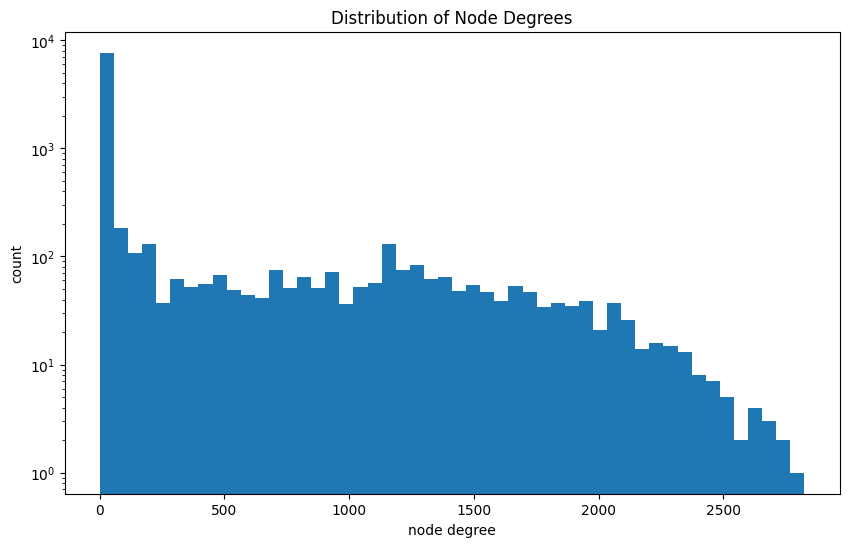

In [33]:
data = Data(edge_index=edges, num_nodes=len(nodes))

G = to_networkx(data, to_undirected=False)
degrees = [val for (node, val) in G.degree()]
display(pd.DataFrame(pd.Series(degrees).describe()).transpose().round(2))
# print(len(degrees))
# print(sum(degrees))
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50)
plt.xlabel("node degree")
plt.ylabel("count")
plt.yscale('log')
plt.title('Distribution of Node Degrees')
plt.show()

In [34]:
# node type distribution

# DB... - drug
# FOOD... - food
# FDB... - food compound
# cas number
# DBSALT... - drug salt
# subclass
# protein_...
# sideeffect_...
# disease_...
# SMP... - pathway
# pathway category 
# P/Q... - enzyme

# 12 types of nodes
nodes_list = data_df[['head', 'tail']].stack().unique()
nodes_df = pd.DataFrame({'node_id': nodes_list})

# it may be incorrect in some cases ??
nodes_df['node_type'] = list(itertools.repeat('cas_num', nodes_df.shape[0]))
nodes_df.loc[nodes_df['node_id'].str.contains("DB"), 'node_type'] = "drug"
nodes_df.loc[nodes_df['node_id'].str.contains("FOOD"), 'node_type'] = "food"
nodes_df.loc[nodes_df['node_id'].str.contains("FDB"), 'node_type'] = "food_compound"
nodes_df.loc[nodes_df['node_id'].str.contains("DBSALT"), 'node_type'] = "salt"
nodes_df.loc[nodes_df['node_id'].str.contains("class"), 'node_type'] = "drug_class"
nodes_df.loc[nodes_df['node_id'].str.contains("protein"), 'node_type'] = "protein"
nodes_df.loc[nodes_df['node_id'].str.contains("sideeffect"), 'node_type'] = "side_effect"
nodes_df.loc[nodes_df['node_id'].str.contains("disease"), 'node_type'] = "disease"
nodes_df.loc[nodes_df['node_id'].str.contains("SMP"), 'node_type'] = "pathway"
nodes_df.loc[nodes_df['node_id'].str.contains("pathway_cat"), 'node_type'] = "pathway_category"
nodes_df.loc[nodes_df['node_id'].str.contains("^[OPQ]\d+", regex=True), 'node_type'] = "enzyme"

nodes_df_grouped = nodes_df.groupby(by=['node_type']).count()
nodes_df_grouped.columns = ['count']
nodes_df_grouped = nodes_df_grouped.sort_values(by='count', ascending=False)
nodes_df_grouped

count
node_type           
drug            2558
food             801
pathway          758
food_compound    259

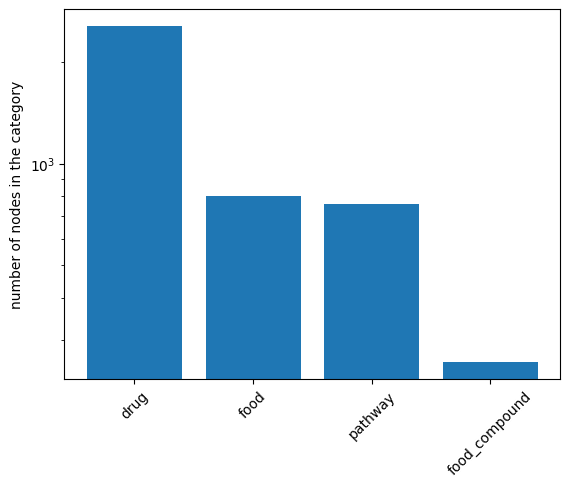

In [35]:
counts = nodes_df_grouped['count'].values
node_types = nodes_df_grouped.index

plt.bar(node_types, counts)
plt.xticks(rotation = 45) 
plt.yscale('log')
plt.ylabel('number of nodes in the category')
plt.show()

In [44]:
# edge type distribution
edge_types_grouped = data_df.groupby(by=['relation']).count()
edge_types_grouped = edge_types_grouped.drop(columns=['tail', 'node_type'])
edge_types_grouped

head
relation                    
contains               13144
interacts            1345753
involved_in_pathway     1957

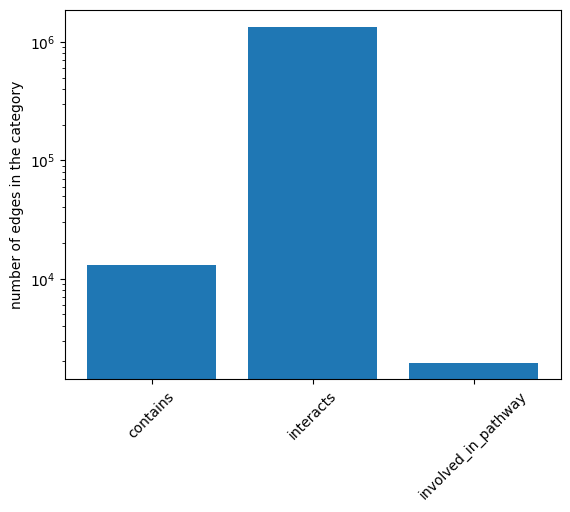

In [46]:
counts = list(edge_types_grouped['head'].values)
edge_types = list(edge_types_grouped.index)

plt.bar(edge_types, counts)
plt.xticks(rotation = 45) 
plt.yscale('log')
plt.ylabel('number of edges in the category')
plt.show()

In [ ]:
# relations_unique = data_df.relation.unique()
# with open('unique_relations.txt', 'w') as f:
#     for rel in relations_unique:
#         f.write(rel + '\n')

In [ ]:
# connections of enzymes/pathways to drugs

In [47]:
# vizualiztion for a specific drug(s)

In [48]:
# if we devide the interaction to positive and negative or both (depends on context/drugs)
labels = pd.read_csv('../data/unique_relations-labeled.csv', sep=';')

labels.groupby(by=['positive/negative']).count()

relation
positive/negative                  
both (depends on context)        11
both (depends on drugs)          16
negative                        151
positive                         25

Following code from https://github.com/kennethleungty/Drug-Interactions-Network-Analysis-and-Visualization/blob/main/02_Network_Analysis_and_Visualization.ipynb

In [49]:
# Generate a networkx graph
G = nx.from_pandas_edgelist(data_df, 'head', 'tail')

# Give the graph a name
G.name = 'Drug Interactions Network'

# Check whether graph is directed or undirected (False = undirected)
print(G.is_directed())

# Obtain general information of graph
# print(nx.info(G))

# Get graph density
density = nx.density(G)
print("Network density:", density)

False
Network density: 0.07051867328284148


In [50]:
# Create dictionary to store degrees of nodes
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

# Generate sorted list of tuples of drug entity and corresponding degree
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 drugs by degree:")
for d in sorted_degree[:10]:
    d_name = drug_ingredients[drug_ingredients['id'] == d[0]].drug_name.values[0]
    print(d, d_name)

Top 20 drugs by degree:


KeyError: 'id'

In [ ]:
# Get degree centrality (corresponds with degree)
degree_centrality = nx.degree_centrality(G)
degree_centrality = dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))
degree_centrality

In [51]:
# Define function to generate Pyvis visualization
def generate_network_viz(df, source_col, target_col, 
                         layout='repulsion',
                         central_gravity=0.15,
                         node_distance=420,
                         spring_length=100,
                         spring_strength=0.15,
                         damping=0.96
                         ):
    
    # Generate a networkx graph
    G = nx.from_pandas_edgelist(df, source_col, target_col)
    
    if layout == 'repulsion':
        bgcolor, font_color = '#222222', 'white'
    else:
        bgcolor, font_color = 'white', 'black'
    
    # Initiate PyVis network object
    drug_net = Network(
                       height='700px', 
                       width='100%',
                       bgcolor=bgcolor, 
                       font_color=font_color, 
                       notebook=True
                      )
    
    # Take Networkx graph and translate it to a PyVis graph format
    drug_net.from_nx(G)

    drug_net.repulsion(
                        node_distance=node_distance, 
                        central_gravity=central_gravity, 
                        spring_length=spring_length, 
                        spring_strength=spring_strength, 
                        damping=damping
                       )

    return drug_net

In [55]:
# reverse_nodes_map = dict((v, k) for k, v in nodes_map.items())
# edges_sample_names = [[],[]]
# for d in edges_sample[0]:
# #     print(d.item())
#     edges_sample_names[0].append(reverse_nodes_map[d.item()])
# for d in edges_sample[1]:
# #     print(d.item())
#     edges_sample_names[1].append(reverse_nodes_map[d.item()])  

node_name='DB04574'
temp = G.copy(as_view=False) # make a temporary graph to avoid losing original ones
nodelist = list(temp.neighbors(n=node_name)) #generate the nodes that have relationship with our target node
nodelist.append(node_name) # add the target to the list
Sub = temp.subgraph(nodelist) # draw subgraph
#     edges= *nx.get_edge_attributes(Sub).items()
edges = Sub.edges
edges

EdgeView([('SMP0000532', 'DB04574'), ('DB01075', 'DB00091'), ('DB01075', 'DB11730'), ('DB01075', 'DB00783'), ('DB01075', 'DB00613'), ('DB01075', 'DB01118'), ('DB01075', 'DB00379'), ('DB01075', 'DB00857'), ('DB01075', 'DB01176'), ('DB01075', 'DB00454'), ('DB01075', 'DB00418'), ('DB01075', 'DB01002'), ('DB01075', 'DB01563'), ('DB01075', 'DB00439'), ('DB01075', 'DB00568'), ('DB01075', 'DB01184'), ('DB01075', 'DB00709'), ('DB01075', 'DB00533'), ('DB01075', 'DB00261'), ('DB01075', 'DB01115'), ('DB01075', 'DB11672'), ('DB01075', 'DB00574'), ('DB01075', 'DB01324'), ('DB01075', 'DB00628'), ('DB01075', 'DB00263'), ('DB01075', 'DB12500'), ('DB01075', 'DB00738'), ('DB01075', 'DB01251'), ('DB01075', 'DB01232'), ('DB01075', 'DB00669'), ('DB01075', 'DB01100'), ('DB01075', 'DB00372'), ('DB01075', 'DB00065'), ('DB01075', 'DB01281'), ('DB01075', 'DB09268'), ('DB01075', 'DB06803'), ('DB01075', 'DB00608'), ('DB01075', 'DB01242'), ('DB01075', 'DB00977'), ('DB01075', 'DB01273'), ('DB01075', 'DB11823'), ('D

In [64]:
sample_df = pd.DataFrame(edges, columns=['head', 'tail'])
print(sample_df.shape)
sample_df.head()

(344665, 2)


head     tail
344660  DB06779  DB00177
344661  DB01166  DB00924
344662  DB01166  DB08911
344663  DB01166  DB05018
344664  DB05018  DB08911

In [65]:
# Generate a networkx graph based on subset data
db_subset_net = generate_network_viz(sample_df, 'head', 'tail', layout='repulsion')

# Display interactive graph
db_subset_net.show('drug_interactions_network_subset_repulsion.html')


KeyboardInterrupt: 

In [66]:

def drawnodegraph(graph, nodename, info=False,weightbar=0):
      # graph will be your networkx graph
      # nodename will be the node that you want to focus on
      # the default value for weightbar is 0, if increase the bar, rare relationship will be removed. Assuming no negative weights
    temp = graph.copy(as_view=False) # make a temporary graph to avoid losing original ones
    temp.remove_edges_from((e for e, w in nx.get_edge_attributes(temp,'weight').items() if w <= weightbar)) # remove rare relationhsip if weightbar is not 0
    nodelist = list(temp.neighbors(n=nodename)) #generate the nodes that have relationship with our target node
    nodelist.append(nodename) # add the target to the list
    Sub = temp.subgraph(nodelist) # draw subgraph
#     edges= *nx.get_edge_attributes(Sub).items()
    edges = Sub.edges
    pos=nx.spring_layout(Sub,k=0.7,seed=42)
    node_map = {nodename:7000} 
    nodesize=[node_map.get(node, 3500) for node in Sub.nodes()] # enlarge our target node
    val_map = {nodename:0.5714285714285714}
    nodecolor = [val_map.get(node, 0.25) for node in Sub.nodes()] # change the color of our target node
#     width = [w*5 for w in weights] # change the edge's width based on the weights of the edges
    width = 1
    nx.draw_networkx(Sub,
                   pos,
                   cmap=plt.get_cmap('viridis'),
                   with_labels=True,
                   node_size=10,
                   node_color=nodecolor,
                   edgelist=edges, 
                   edge_color="blue",
                   #edge_cmap=plt.cm.Blues_r,
                   style="solid",
                   font_color='black',
                   font_size=14,
                   width =width)
    plt.subplots_adjust(left=2, bottom=3.2, right=6, top=6)

    if info:
        print("----------------------------------------")
        print("Density:",nx.classes.function.density(Sub))
        print("The information of the graph:",nx.info(Sub))
        print("----------------------------------------")

    return plt.show()

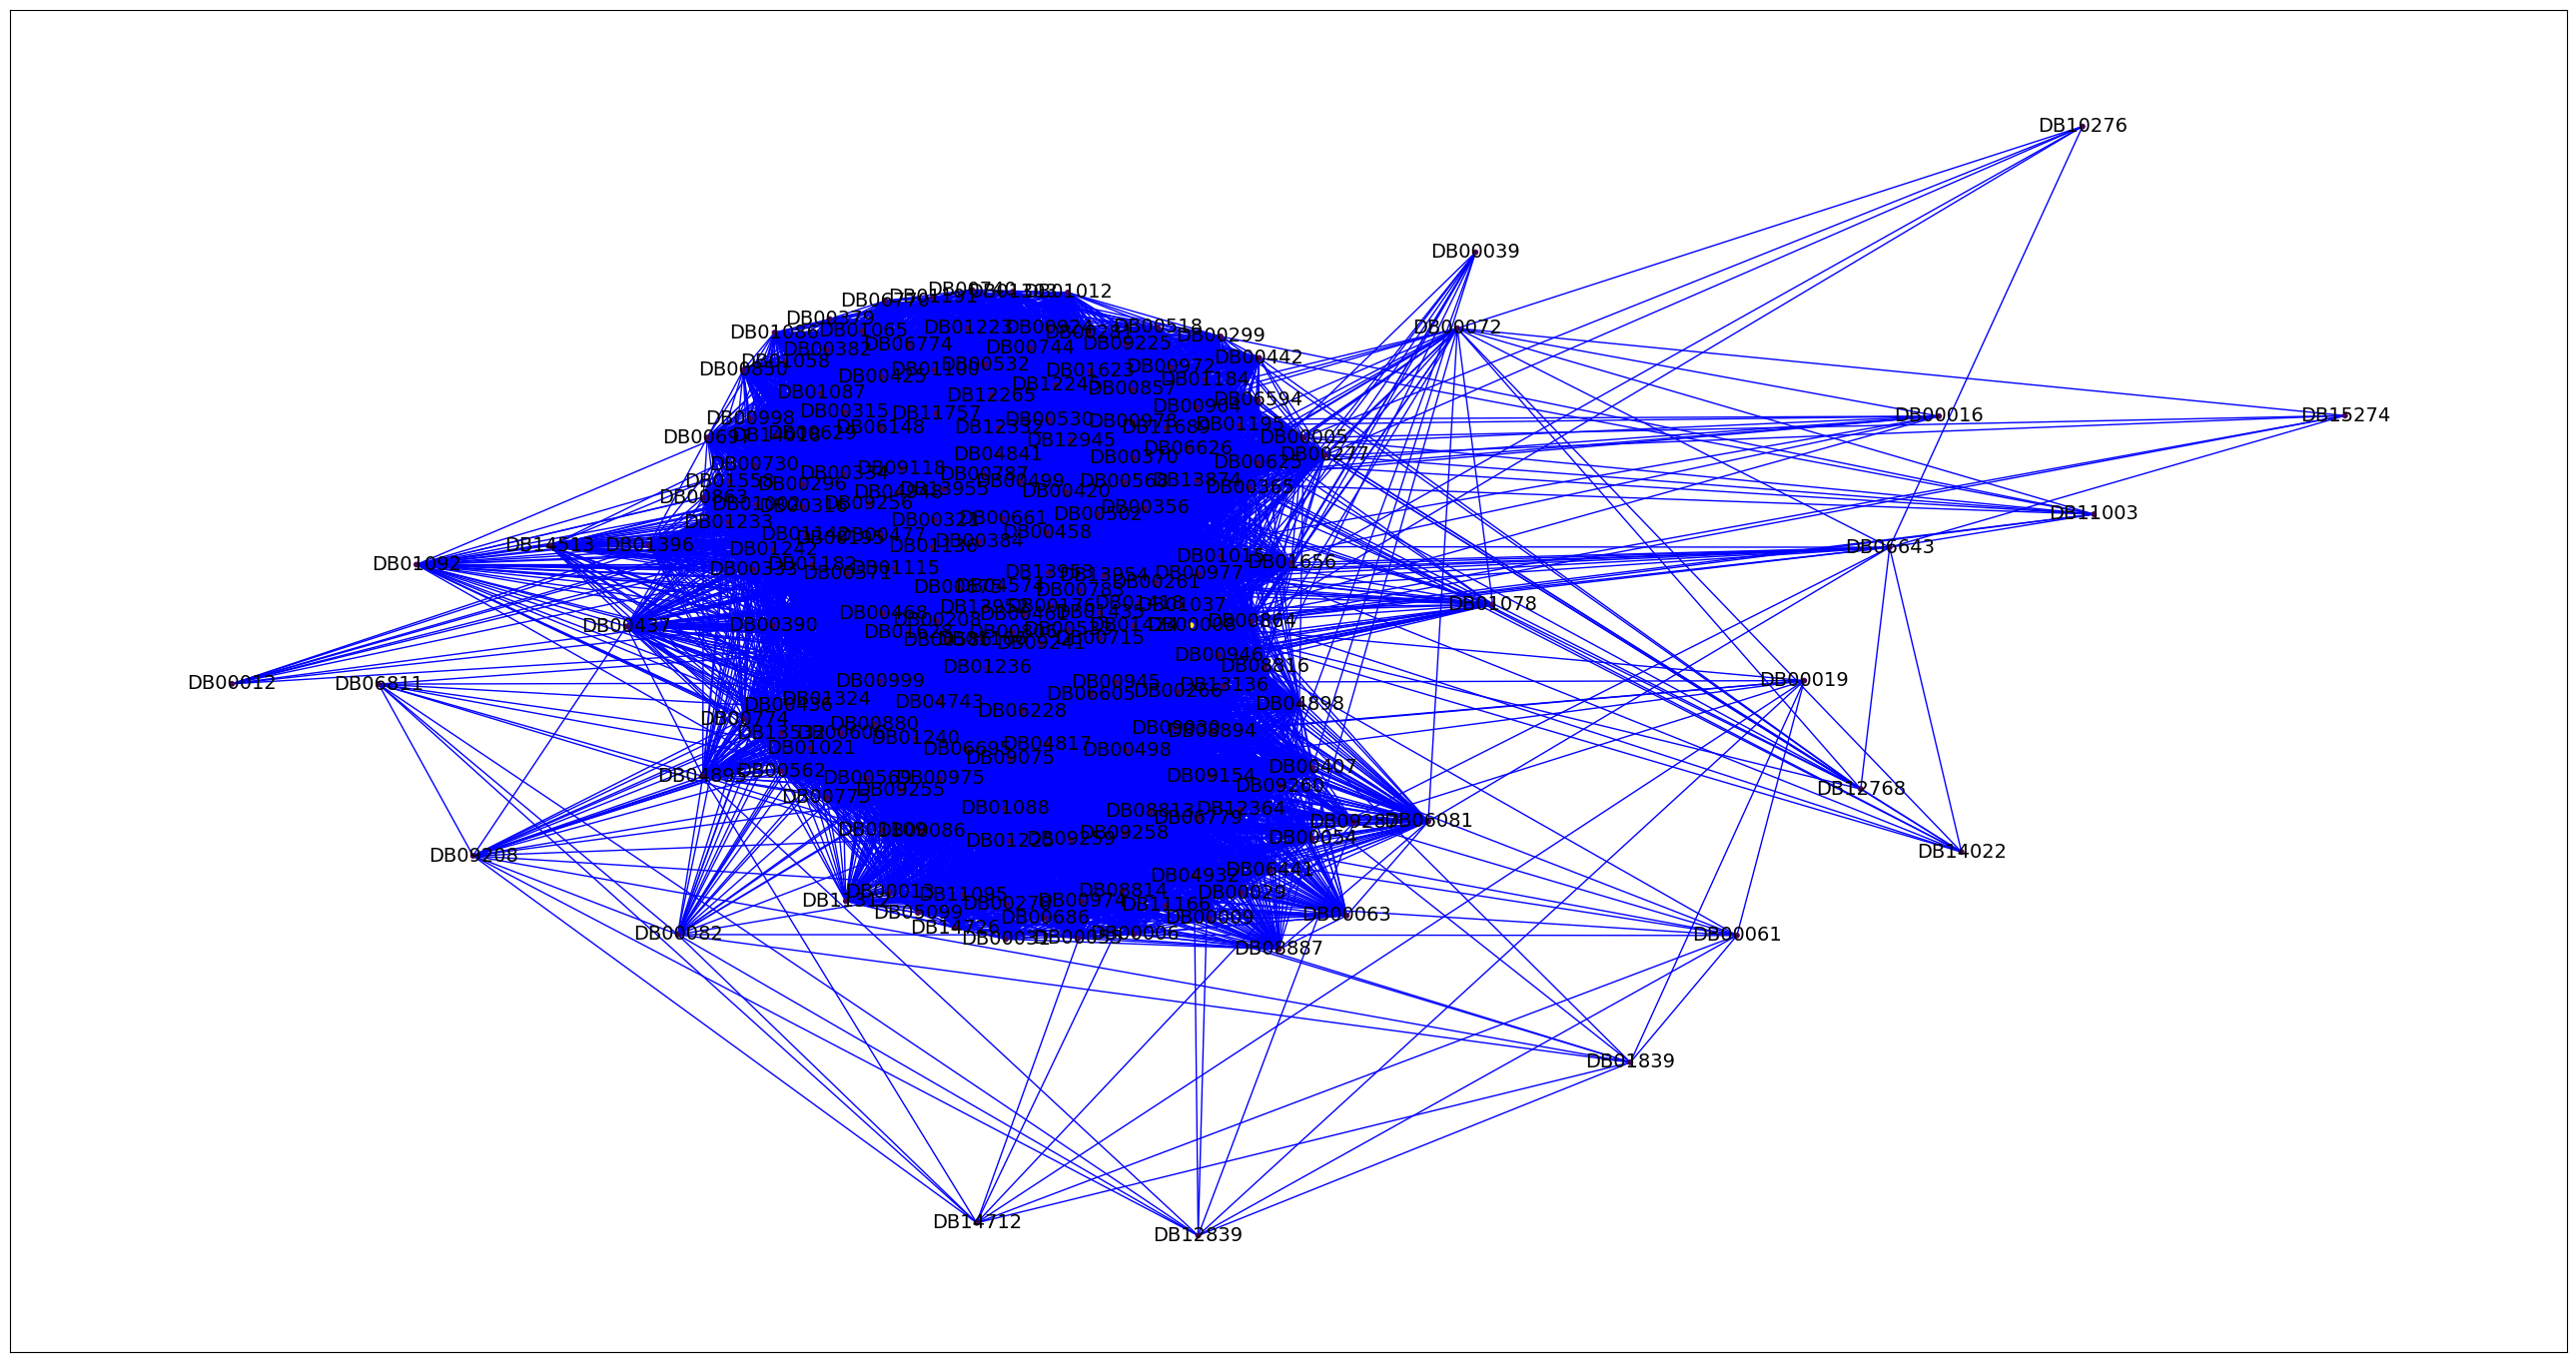

In [67]:
drawnodegraph(G, 'DB00008')